# 1.3. Linear Regression
_________________________________
### Key Concepts:
* QR Decomposition
* Least Squares
* Linear Regression

In [1]:
import numpy as np
import plotly.express as px

### Helper Functions

In [2]:
def generate_random_matrix(size: int = 3):
    """
    Generates Random Square Matrix of given Size with Integers (0-99)
    """
    return np.random.randint(0, 100, [size, size])

In [3]:
def project(u, a):
    """
    Project vector u onto a
    """
    return (np.dot(u, a) / np.dot(u, u)) * u

In [4]:
def gram_schmidt_matrix(A):
    """
    Find the Gram-Schmidt of a Matrix
    """

    # Set A to float type
    A = A.astype('float64')

    # Copy A. First column remains the same
    U = np.copy(A.astype('float64'))

    # Copy A. First column is the same but normalized
    E = np.zeros(A.shape)
    E[:, 0] = A[:, 0] / np.linalg.norm(A[:, 0])

    # Iterate through each column
    for k in range(1, U.shape[1]):

        u_k = A[:, k]

        # Iterate through each column to the left of k
        for j in range(k):
            u_k -= project(U[:, j], A[:, k])

        # Update U
        U[:, k] = u_k

        # Update E
        E[:, k] = U[:, k] / np.linalg.norm(U[:, k])

    return E

### Global Variables

In [5]:
matrix_size = 3

# Generate a random 3x3 Matrix A
A = generate_random_matrix(matrix_size)
print("Random 3x3 Matrix A:\n", A)

# Generate another random matrix B
B = generate_random_matrix(matrix_size)
print("Random 3x3 Matrix B:\n", B)

Random 3x3 Matrix A:
 [[25 20 91]
 [70 18 50]
 [26 46 58]]
Random 3x3 Matrix B:
 [[56 44 98]
 [88  8 64]
 [71 27 71]]


## QR Decomposition

A square matrix $A$ is decomposed as
$A=QR$
where $Q$ is an orthogonal matrix (i.e. $Q ^T = Q ^{-1}$)
and $R$ is an upper/right triangular matrix

Formulas:
$Q = [e _1 ... e _k ]$
$R = Q ^T A$

In [6]:
def QR(A):
    """
    QR Decomposition of A
    :param A: Square Matrix A
    :return: (Q, R)
    """

    # Calculate Q
    Q = gram_schmidt_matrix(A)

    # Calculate R
    R = np.zeros(A.shape)
    for row in range(A.shape[0]):
        for col in range(row, A.shape[0]):
            R[row, col] = np.dot(A[:, col], Q[:, row])

    return Q, R

In [7]:
Q_A, R_A = QR(A)

print(f"QR Decomposition of A:\n{A}\n")
print(f"Q:\n{Q_A}\n")
print(f"R:\n{R_A}\n")

QR Decomposition of A:
[[25 20 91]
 [70 18 50]
 [26 46 58]]

Q:
[[ 0.31747472  0.21367185  0.92387994]
 [ 0.8889292  -0.40629199 -0.21149868]
 [ 0.3301737   0.88840934 -0.31892658]]

R:
[[78.74642849 37.53821039 92.48673419]
 [ 0.         37.827011   50.6572807 ]
 [ 0.          0.         55.0003992 ]]



#### Verify Q is Orthonormal
$Q \cdot Q ^T = I$

In [8]:
# Calculate QQt
QQt_A = np.dot(Q_A, np.transpose(Q_A))
# Round to 5 decimals
QQt_A = np.round(QQt_A, 5)

print(f"QQt:\n {QQt_A} \n")

# Check if QQt is an Identity Matrix
QQt_is_I = np.allclose(QQt_A, np.eye(A.shape[0]))
print(f"QQt {'IS' if QQt_is_I else 'IS NOT'} an Identity Matrix")

QQt:
 [[ 1.  0. -0.]
 [ 0.  1. -0.]
 [-0. -0.  1.]] 

QQt IS an Identity Matrix


#### Verify $A=QR$

In [9]:
# Calculate A=QR
AQR = np.dot(Q_A, R_A)
print(f"A:\n {A} \n")
print(f"QR:\n {AQR} \n")

# Check if QR = A
QR_is_A = np.allclose(AQR, A)
print(f"QR {'==' if QR_is_A else '!='} A")

A:
 [[25 20 91]
 [70 18 50]
 [26 46 58]] 

QR:
 [[25. 20. 91.]
 [70. 18. 50.]
 [26. 46. 58.]] 

QR == A


## Ordinary Least Squares

In [10]:
def generate_random_data(start = 0, end = 1000, spacing = 1, noise = 0.25):
    """
    Generates Random Linear Data
    :param start: Starting X Value
    :param end: Ending X Value
    :param spacing: Spacing between values
    :param noise: Noise Ratio
    :return: X, Y
    """
    # Generate X values from params
    X = np.arange(start=start, stop=end, step=spacing)

    # Generate Y values from X and noise
    y_b = np.random.randint(start, end)
    y_m = np.random.randint(start/100, end/100)

    Y = y_b + (y_m * X) + (X * np.random.random(len(X)) * noise)

    return X, Y, (y_m, y_b)

In [11]:
def ols(X, Y):
    """
    Ordinary Least Squares
    :param X: X values
    :param Y: Y values
    :return: (slope, intercept)
    """
    # Add ones column to X
    x = np.vstack([X, np.ones(len(X))]).T

    # Convert Y into a column vector
    y = Y[:, np.newaxis]

    # Apply OLS
    p_inv = np.linalg.pinv(x)
    y_params = p_inv.dot(y)

    return round(y_params[0][0], 3), round(y_params[1][0], 3)

OLS Fit: Y = 1.129X + 494.217
Slope Error: 12.90%
Intercept Error: 0.04%


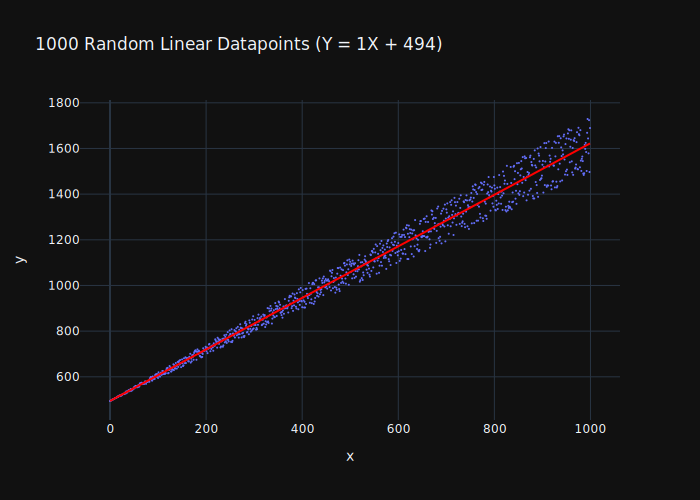

In [12]:
# Generate random data
x_rand, y_rand, (y_slope, y_int) = generate_random_data()

# Apply OLS
fit_m, fit_b = ols(x_rand, y_rand)
print(f"OLS Fit: Y = {fit_m}X + {fit_b}")
print(f"Slope Error: {(abs(y_slope - fit_m)) /y_slope *100:.2f}%")
print(f"Intercept Error: {(abs(y_int - fit_b)) /y_int *100:.2f}%")

# Add the Scatter Plot of Random Points
fig = px.scatter(
    x=x_rand,
    y=y_rand,
    title=f"1000 Random Linear Datapoints (Y = {y_slope}X + {y_int})",
)

# Update markers size
fig.update_traces(marker=dict(size=2))

# Plot the Best Fit Line from OLS
fig.add_traces(
    px.line(
        x=x_rand,
        y=(x_rand*fit_m + fit_b),
        color_discrete_sequence=["red"],
    ).data
)

fig.show("svg")